<a href="https://colab.research.google.com/github/MuhmmadAbrar/MyDeepLearningWorkspace/blob/main/%5C27-dec%5CANN_introduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 20 kB/s 
     |████████████████████████████████| 439 kB 55.7 MB/s 
     |████████████████████████████████| 1.7 MB 67.8 MB/s 
     |████████████████████████████████| 6.0 MB 58.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-estimator-2.9.0:
      Successfully uninstalled tensorflow-estimator-2.9.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.9.1
    Uninstalling tensorboard-2.9.1:
      Successfully uninstalled tensorboard-2.9.1
  Attempting uninstall: keras
    Found existing installation: keras 2.9.0
    Uninstalling keras-2.9.0:
      Successfully uninstalled keras-2.9.0
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully u

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.9.2


In [ ]:
#import some basic libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
dataset = pd.read_csv("Churn_Modelling.csv")
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
## Divide the dataset into independent and dependent features
#Independent - X
#Dependednt - Y

X = dataset.iloc[:,3:13]
y = dataset.iloc[:,13]

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
## Feature Engineering
geography = pd.get_dummies(X['Geography'],drop_first="True")
gender = pd.get_dummies(X['Gender'],drop_first = 'True')

In [ ]:
#Concatenate with these dataframes

X = X.drop(['Geography','Gender'],axis=1)

In [ ]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [ ]:
X = pd.concat([X,geography,gender],axis=1)

In [ ]:
#Splitting the dataset into Training Set and Test Set

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
#feature scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [ ]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [ ]:
X_train.shape

(8000, 11)

In [ ]:
## Part 2 Now lets create the ANN

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
### Let's initialize the ANN

classifier = Sequential()

In [ ]:
## Adding the input layer

classifier.add(Dense(units=11,activation="relu"))

In [ ]:
# adding the first hidden layer

classifier.add(Dense(units=7,activation='relu'))

In [ ]:
## adding the second hidden layer

classifier.add(Dense(units=6,activation='relu'))

In [ ]:
## Adding the output layer

classifier.add(Dense(1,activation='sigmoid'))

In [ ]:
#provide your own learning rate

import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#Train the neural network

classifier.compile(optimizer = opt,loss = 'binary_crossentropy',metrics=['accuracy'])

In [ ]:
## Early stopping
#google early stopping keras and copy that code in here

import tensorflow as tf

early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
)


In [ ]:
model_history = classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3129 - accuracy: 0.8668 - val_loss: 0.3978 - val_accuracy: 0.8554
Epoch 2/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3134 - accuracy: 0.8660 - val_loss: 0.3954 - val_accuracy: 0.8519
Epoch 3/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3139 - accuracy: 0.8636 - val_loss: 0.3835 - val_accuracy: 0.8455
Epoch 4/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3143 - accuracy: 0.8647 - val_loss: 0.3961 - val_accuracy: 0.8538
Epoch 5/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3130 - accuracy: 0.8634 - val_loss: 0.3829 - val_accuracy: 0.8561
Epoch 6/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3154 - accuracy: 0.8655 - val_loss: 0.3846 - val_accuracy: 0.8482
Epoch 7/1000
536/536 [==============================] - 2s 4ms/step - loss: 0.3134 - accuracy: 0.8671 - val_loss: 0.4012 - val_accuracy:

In [ ]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

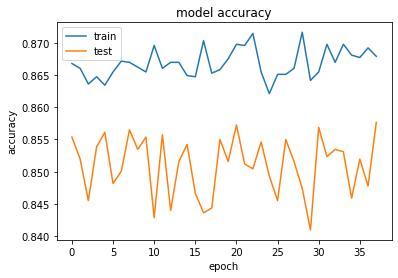

In [ ]:
#summarize history for accuracy

plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

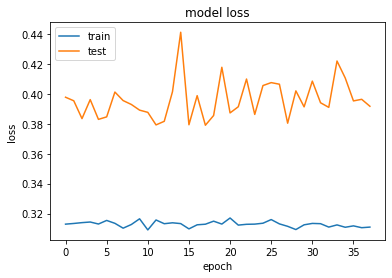

In [ ]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
#Predicting test set results

y_pred = classifier.predict(X_test)
y_pred = (y_pred>0.5)

63/63 [==============================] - 0s 2ms/step


In [ ]:
## make the confusion matrix

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

array([[1538,   57],
       [ 218,  187]])

In [ ]:
## Calculate accuracy
from sklearn.metrics import accuracy_score
score = accuracy_score(y_pred,y_test)

In [ ]:
score

0.8625

In [ ]:
## get the weights
classifier.get_weights()

[array([[-1.1655589 , -1.1433606 , -0.16366994,  1.8016858 ,  0.3413102 ,
          2.2926457 ,  0.21065892,  0.4522322 ,  0.5353245 ,  1.4445499 ,
         -0.6352697 ],
        [ 0.6642528 , -2.3801637 , -5.5206304 ,  0.5213665 ,  0.9834493 ,
         -4.785657  ,  0.50172126, -2.2613153 , -6.7892704 , -3.877937  ,
          4.7786016 ],
        [ 1.0782471 , -1.460774  ,  1.7989117 , -0.45340186, -0.8699376 ,
         -1.7263328 , -0.64460987,  2.165325  , -0.02776125, -1.2444185 ,
          0.86780596],
        [-2.2954245 ,  3.0061266 ,  0.9913949 , -0.46094325, -2.0748456 ,
          0.30526578,  5.9710536 , -1.4328952 ,  0.29364488, -3.4085076 ,
         -0.80975854],
        [-4.845836  ,  4.6145477 , -2.5271904 ,  4.228823  ,  6.424002  ,
         -2.8646188 ,  5.9593773 ,  6.5672445 ,  2.3284414 , -0.6990833 ,
         -1.0171509 ],
        [ 0.18575233,  1.3669584 ,  0.98610973, -0.28361812,  1.3065842 ,
          3.0416574 ,  0.40454692,  0.21239638, -1.5131657 , -2.1769497